# Exercise Sheet 4: Clustering and Multiclass Logistic Regression

This repository contains **Exercise Sheet 4**, which explores **Clustering** methods and extends **Logistic Regression** for **multiclass classification** in astronomy.

## Topics Covered

### 1. Clustering (K-Means and Expectation-Maximization)
Clustering is a fundamental technique in **unsupervised learning**, where data points are grouped based on their similarity.  
**Key Concepts:**
- **K-Means Clustering**: An iterative algorithm to partition data into K clusters by minimizing intra-cluster variance.
- **Expectation-Maximization (EM) Algorithm**: A probabilistic approach to clustering, often used for **Gaussian Mixture Models (GMMs)**.
- Implementation of K-Means **from scratch** to gain insights into its inner workings.
- Comparing our implementation with the **scikit-learn** version.

### 2. Multiclass Logistic Regression (Star, Galaxy, or Quasar?)
Logistic Regression is a **multiclass classification** technique used when there are more than two possible labels.  
**Key Concepts:**
- Extending **logistic regression** for **multinomial classification** (rather than just binary classification).
- Using **PyTorch** to implement a multinomial classifier.
- Working with real-world data from the **Sloan Digital Sky Survey (SDSS)**.
- Classifying celestial objects as **stars, galaxies, or quasars** using spectral data.
- Understanding astronomical measurements such as **Right Ascension, Declination, and Redshift**.

## Purpose
This exercise sheet is designed to provide hands-on experience with:
- **Clustering algorithms** and their implementation.
- **Multiclass Logistic Regression** for real-world classification problems.
- **Using real-world astronomical datasets** to build predictive models.

---





### 1. K-Means and EM

*Topics: clustering, unsupervised learning*

**Reading Material: Murphy 11.4, and especially 11.4.2 and especially especially 11.4.2.5**

In this exercise, we will be implementing the K-means clustering algorithm by hand. Although efficient algorithms (that you should definitely use for your own projects!) are implemented in `scikit-learn`, sometimes it's helpful to see how things work by writing your own implementation.

We will work with some previously generated data.


Text(0, 0.5, '$x_2$')

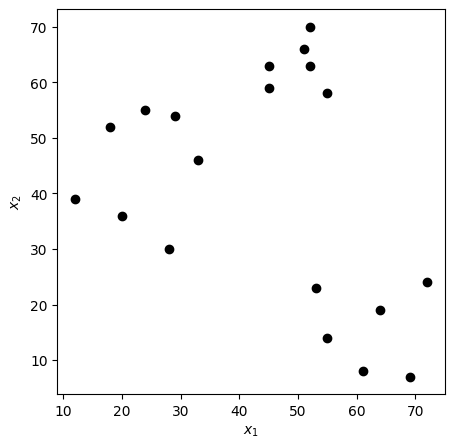

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Some previously geenerated random data in 2 dimensions
data = np.array([[12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
     [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]]).T

fig = plt.figure(figsize=(5, 5))
plt.scatter(data[:,0], data[:,1], color='k')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

1. Take a look at the plot of our datapoints. Generate initial random values for the centroids (means) such that they are randomly distributed throughout the whole data space. Use $k=3$. Your centroids should be stored as a $k \times 2$ numpy array, with each row giving the $x_1, x_2$ values of the centroid. Plot a scatter plot of the data along with your centroids in red, green, and blue. 

[[59 54]
 [12 23]
 [55 59]]


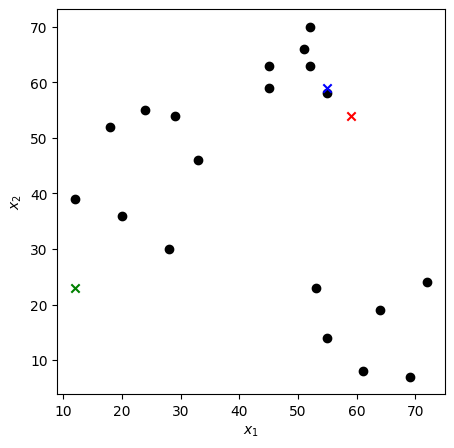

In [2]:
k=3


def centroid(d):
  c1= np.random.randint(np.min(d[:,0]) , np.max(d[:,0]))
  c2= np.random.randint(np.min(d[:,1]) , np.max(d[:,1]))
  c=np.array([c1,c2])
  return c

centroids=np.array([centroid(data),centroid(data),centroid(data)])
print(centroids)

colours=['r','g','b']

# Plot a scatter plot of the data along with your centroids in red, green, and blue
fig = plt.figure(figsize=(5, 5))
plt.scatter(data[:,0], data[:,1], color='k')
for i in range(len(centroids)):
    plt.scatter(centroids[i][0], centroids[i][1], color = colours[i],marker='x' )
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()


2. (Assignment/Expectation) Define the function `closest_centroid`, which should return an array giving the index (0, 1, or 2) of the closest centroid for each datapoint. This function will tell us which centroid is closest. This function plays the same role as
$$r_{n k}=\left\{\begin{array}{ll}
1 & \text { if } k=\arg \min _{j}\left\|\mathbf{x}_{n}-\boldsymbol{\mu}_{j}\right\|^{2} , \\
0 & \text { otherwise } .
\end{array}\right.$$
(although returning directly $k$, not the one-hot encoding). Hint: `np.argmin` could be useful here.





In [3]:
def closest_centroid(k, data, centroids):
    distances=np.zeros((len(data),k))
    for i in range(k):
      distances[:,i]=np.linalg.norm(data-centroids[i], axis=1)
    array_centroid=np.zeros(len(data))
    for j in range(len(data)):
      array_centroid[j]=np.argmin(distances[j])
    return array_centroid
    

closest=closest_centroid(k, data, centroids)
print(closest)

[1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0.]


3. (Moving Centroids/Maximization) Define the function `move_centroids` which should return the new values of the means i.e. centroids, given the previous assignments. This function is equivalent to
$$\boldsymbol{\mu}_{k}=\frac{\sum_{n} r_{n k} \mathbf{x}_{n}}{\sum_{n} r_{n k}}.$$


[[62.33333333 15.83333333]
 [19.5        39.25      ]
 [42.88888889 59.33333333]]


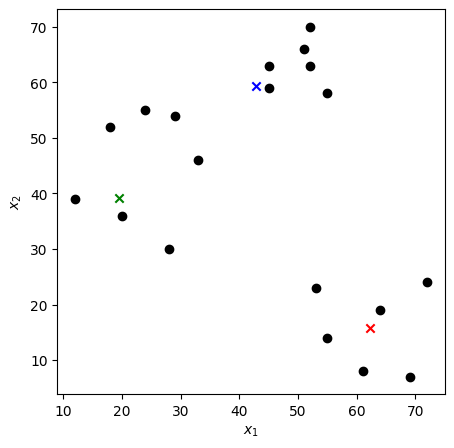

In [4]:
def move_centroids(data, closest, k):
    new_centroids = []
    for i in range(k):
        cluster_data = data[closest == i]
        if len(cluster_data) > 0:
            new_centroid = np.mean(cluster_data, axis=0)
            new_centroids.append(new_centroid)
    return np.array(new_centroids)

move_centroid= move_centroids(data,closest,k)

print(move_centroid)



# Plot a scatter plot of the data along with your centroids in red, green, and blue
fig = plt.figure(figsize=(5, 5))
plt.scatter(data[:,0], data[:,1], color='k')
for i in range(len(move_centroid)):
    plt.scatter(move_centroid[i][0], move_centroid[i][1], color = colours[i], marker='x')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

4. (Iteration) Now we are ready to put our E and M steps together. Decide on a termination criterion, and run your training. This should only take a few steps. At each training step, visualize the assignments of the data points to their respective centroid in plots.

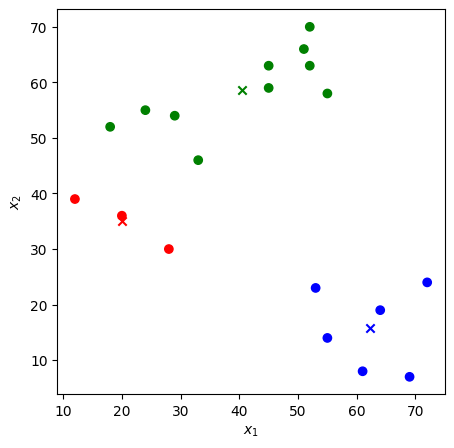

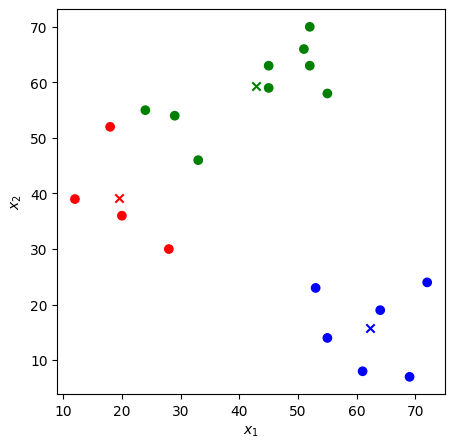

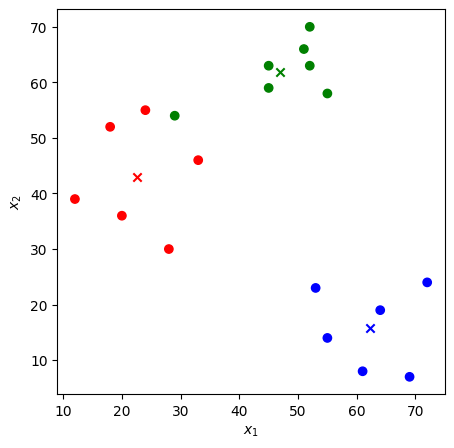

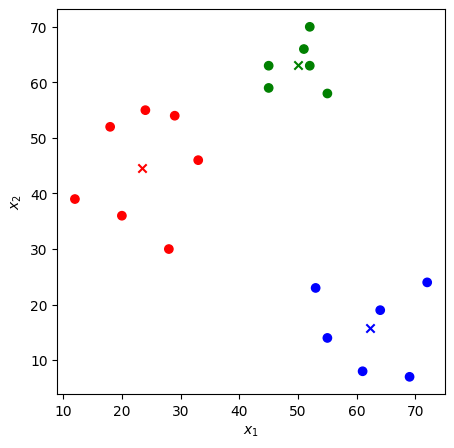

Converged in 5 iterations


In [5]:
# Initialization
k = 3
centroids = np.array([centroid(data), centroid(data), centroid(data)])

threshold = 0.01
max_iterations = 20


# Iteration
for i in range(max_iterations):
    closest = closest_centroid(k, data, centroids)
    move_centroid = move_centroids(data, closest, k)
    
    # Check for convergence
    if np.allclose(centroids, move_centroid, rtol=0, atol=threshold):
        print(f'Converged in {i+1} iterations')
        break
        
    centroids = move_centroid
    
    fig = plt.figure(figsize=(5, 5))
    plt.scatter(data[:, 0], data[:, 1], c=closest, cmap=ListedColormap(colours))
    for j in range(len(centroids)):
        plt.scatter(centroids[j][0], centroids[j][1], color=colours[j], marker='x')
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.show()

5. Discuss briefly when the algorithm does or does not converge. (1 pt)

I tested the algorithm with different numbers of iterations. It seems that 20 iterations always converge. Instead, if you set the number of iterations equal to 10, not always converge and you get an error. I was a bit stuck on the idea, so I asked ChatGPT, and he gave me the line that shows the convergence. Indeed, ChatGPT advised me to use and threshold. This value is a numeric way of understanding if something converges around that value.

6. Now load the data below and run your K-means algorithm again for $k=3$. Do you obtain good results? How would a method using Gaussian mixture models perform differently? 

Text(0, 0.5, '$x_2$')

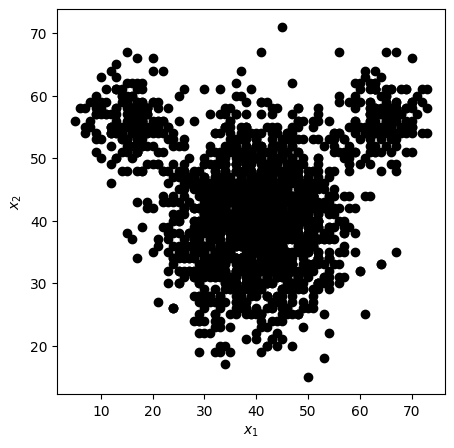

In [6]:
data_mouse = pd.read_csv('data_mouse.csv')
data_mouse = data_mouse.to_numpy()

fig = plt.figure(figsize=(5, 5))
plt.scatter(data_mouse[:,0], data_mouse[:,1], color='k')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

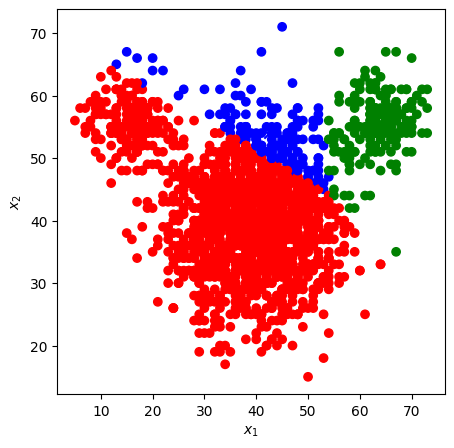

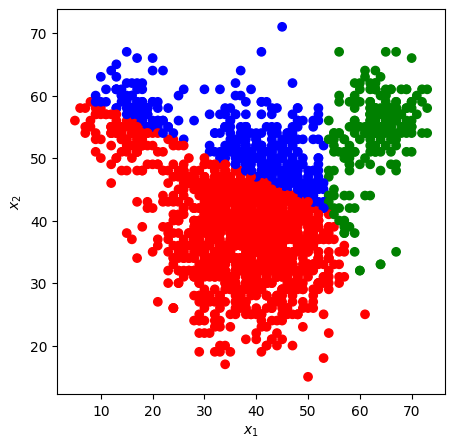

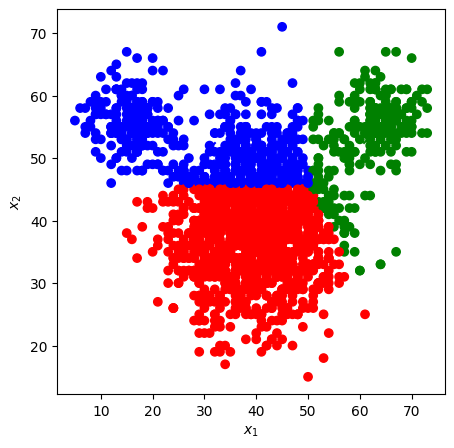

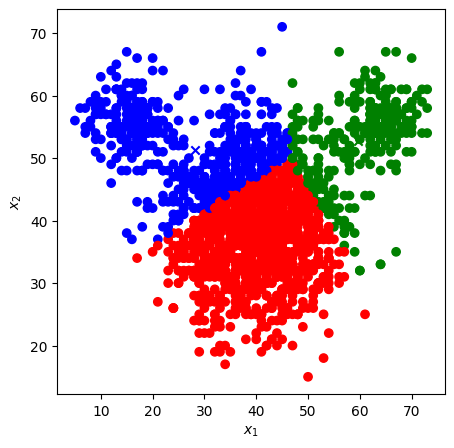

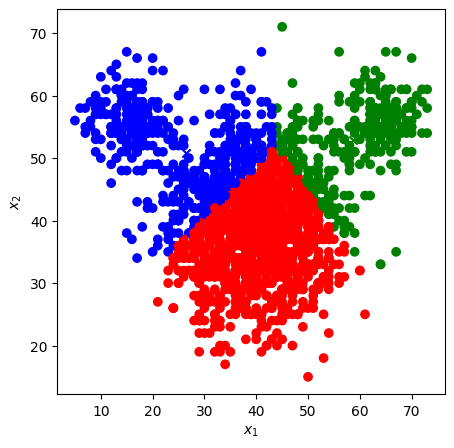

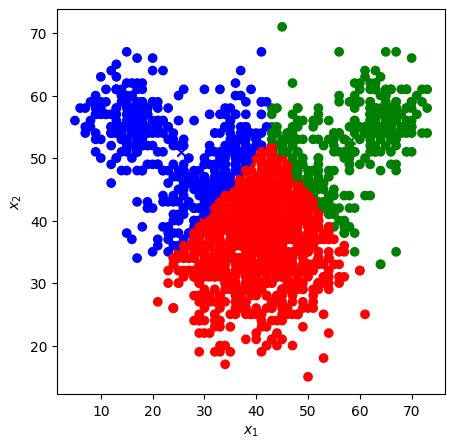

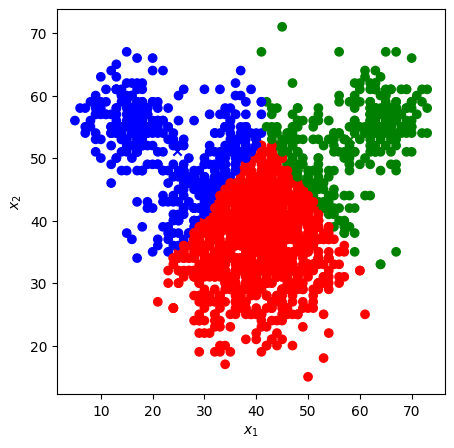

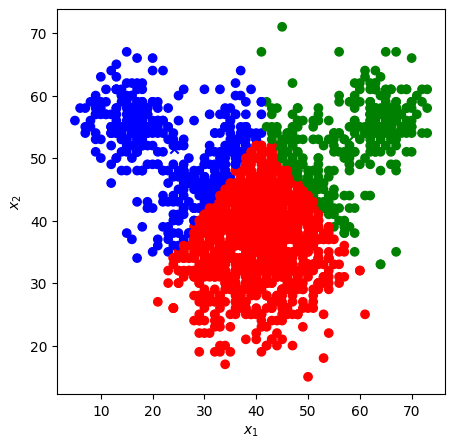

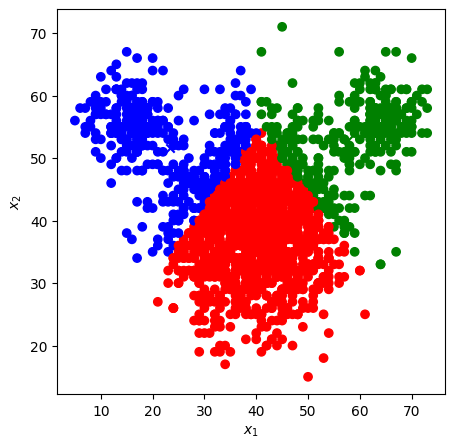

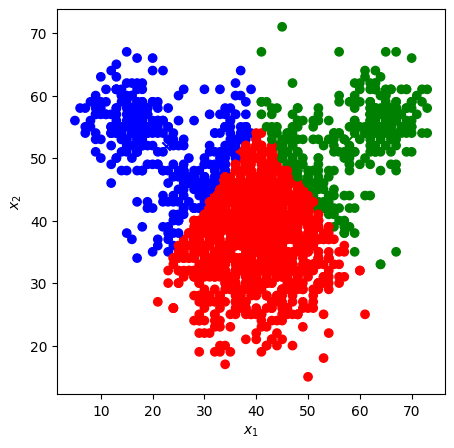

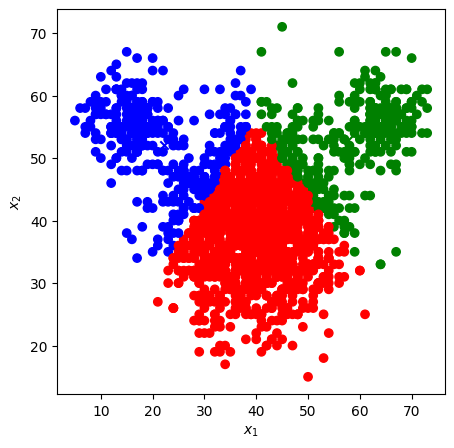

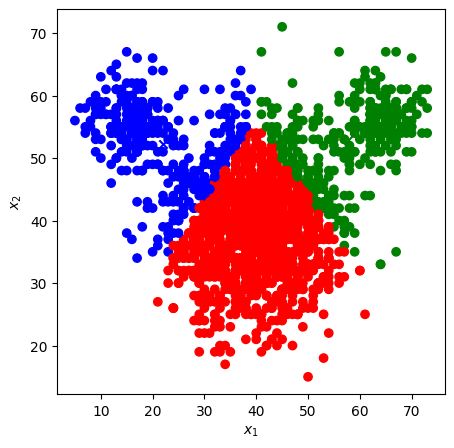

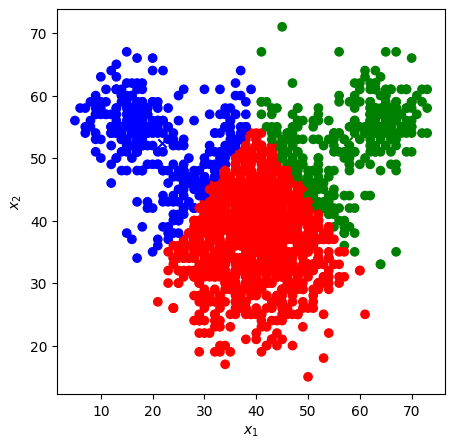

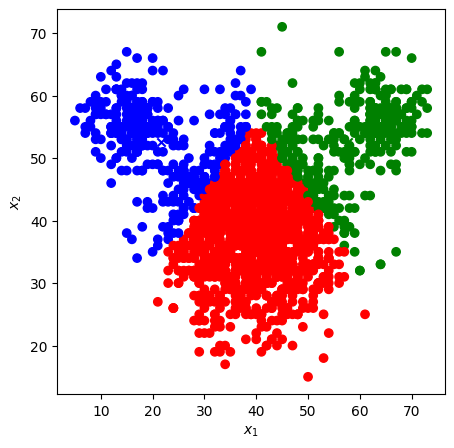

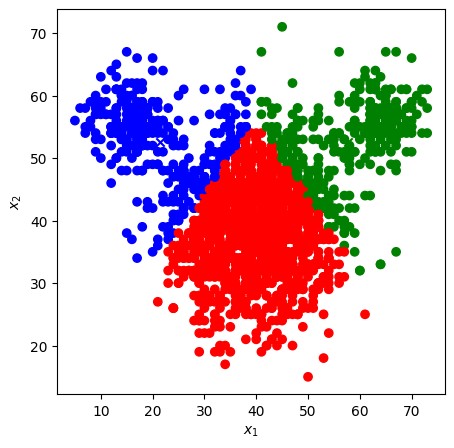

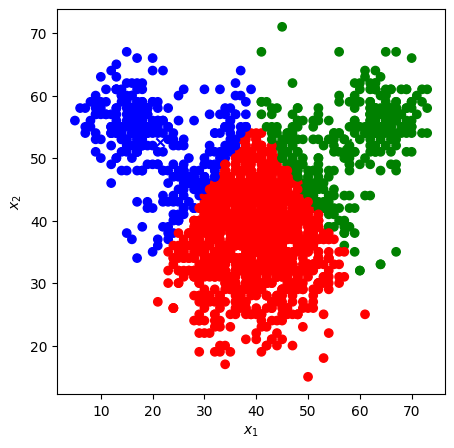

Converged in 17 iterations


In [7]:
centroids_mouse =np.array([centroid(data_mouse),centroid(data_mouse),centroid(data_mouse)])

closest_mouse=closest_centroid(k, data_mouse, centroids_mouse)

move_centroid_mouse= move_centroids(data_mouse,closest_mouse,k)

# Initialization
k = 3
threshold = 0.01
max_iterations = 20


# Iteration
for i in range(max_iterations):
    closest = closest_centroid(k, data_mouse, centroids_mouse)
    move_centroid = move_centroids(data_mouse, closest, k)
    
    # Check for convergence
    if np.allclose(centroids_mouse, move_centroid, rtol=0, atol=threshold):
        print(f'Converged in {i+1} iterations')
        break
        
    centroids_mouse = move_centroid
    
    fig = plt.figure(figsize=(5, 5))
    plt.scatter(data_mouse[:, 0], data_mouse[:, 1], c=closest, cmap=ListedColormap(colours))
    for j in range(len(centroids)):
        plt.scatter(centroids_mouse[j][0], centroids_mouse[j][1], color=colours[j], marker='x')
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.show()

The algorithm seems to always converge, the problem is that it is not able to understand the difference between the clusters. Instead, using the G.M. should have helped to distinguish the Gaussian distribution in the cluster.

### 1. Star, Galaxy, or Quasar? 

![alt text](https://www.sdss.org/wp-content/uploads/2014/05/segue.jpg)


In this problem, we will be extending our PyTorch logististic regression model to predict whether an observed object is a star, galaxy, or quasar.

**The Data**

We will be using data collected by the Sloan Digital Sky Survey ([SDSS](http://www.sdss.org/)) and released as part of Data Release 14. SDSS is a multi-spectral and spectroscopic survey telescope at Apache Point Observatory in New Mexico, USA.

The telescope uses a camera of 30 CCDs which observe in different optical filter bands (u,g,r,i,z). The data used here is freely publicly available.

Therefore we will be importing a table of 10,000 objects, for each of which we have the following information:
- class = tells us whether the object is a GALAXY, STAR, or QSO ("quasi-stellar object" or [quasar](https://en.wikipedia.org/wiki/Quasar))
- ra = [Right Ascension](https://en.wikipedia.org/wiki/Right_ascension)
- dec = Declination
- [redshift](https://en.wikipedia.org/wiki/Redshift)


Magnitude in each of the following [filters](http://skyserver.sdss.org/dr1/en/proj/advanced/color/sdssfilters.asp):
- u
- g
- r
- i
- z

We will not be needing almost any of the imaging data, so you don't need to understand how SDSS works, but if you're curious, you can read about it [here](http://www.sdss3.org/dr9/imaging/imaging_basics.php).

The data you will be using in this exercise has already been preprocessed in the following ways:
- The 'class' feature has been converted to a set of labels (target array) `T`. Here, 0, 1, and 2 correspond to STAR, GALAXY, and QUASAR respectively.
- The rest of the features have been converted to a scaled array `X`.

Run the code below to load the data.

In [8]:
T = pd.read_csv('Skyserver_SQL_labels.csv').to_numpy().flatten()
X = pd.read_csv('Skyserver_SQL_features.csv').to_numpy()

display(T)
display(X)

array([0., 1., 0., ..., 0., 1., 1.])

array([[ 0.16886159, -0.58311429,  0.05243046, ..., -0.08264457,
        -0.02604308, -0.36984929],
       [ 0.17057433, -0.58347525,  0.92156796, ...,  0.44120145,
         0.31452753, -0.05302706],
       [ 0.17455754, -0.58650069, -1.03063038, ..., -0.52660429,
        -0.43092107, -0.36999261],
       ...,
       [-0.92039468,  1.46090664,  0.16753826, ...,  0.74398287,
         0.82921097, -0.37074104],
       [-0.92197294,  1.46432109,  0.31801835, ...,  0.6825157 ,
         0.59598555, -0.33364691],
       [-0.91804124,  1.46639319,  0.79229193, ..., -0.65522289,
        -0.76214106, -0.06510125]])

Now the data processing step: we will need a subset of the data to impartially evaluate the performance of our classifier.

1. First, shuffle your X and T arrays in such a way that each row still corresponds to each row! Split your target array `T` into two arrays: `T_train` and `T_test`, and also create corresponding `X_train` and `X_test` arrays. The train dataset should contain 90% of the datapoints and the test dataset 10% of the datapoints.

In [9]:
from sklearn.model_selection import train_test_split

# Assuming X and T are your feature matrix and target array, respectively
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.1, random_state=42, shuffle=True)

2. Now we are ready to move onto the PyTorch part of the exercises. First convert your train and test arrays to torch tensors. 

In [10]:
import torch

# Convert X_train and X_test to float tensors (features should be floating point)
X_train_tensor = torch.from_numpy(X_train).to(torch.float)
X_test_tensor = torch.from_numpy(X_test).to(torch.float)

# Convert T_train and T_test to long tensors (class labels should be integers)
T_train_tensor = torch.from_numpy(T_train).to(torch.long)
T_test_tensor = torch.from_numpy(T_test).to(torch.long)

# Verify the shapes
print(X_train_tensor.shape, X_test_tensor.shape, T_train_tensor.shape, T_test_tensor.shape)

torch.Size([8999, 8]) torch.Size([1000, 8]) torch.Size([8999]) torch.Size([1000])


3. Extend the code for the Logistic Regression PyTorch model from the previous exercise set to multiclass classification with more than two input parameters. Train your code with the  cross entropy loss, using the SGD optimizer. You can use 15000 steps and a learning rate of 0.02 as a starting point.

In [11]:
import torch

class MulticlassLogisticRegression(torch.nn.Module):
    def __init__(self, input_size=8, num_classes=3):
        super(MulticlassLogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_size, num_classes)  # 8 features → 3 classes

    def forward(self, x):
        return self.linear(x)  # Return raw logits (No softmax!)

# Instantiate Model
model = MulticlassLogisticRegression()

# Loss Function (CrossEntropyLoss handles softmax automatically)
criterion = torch.nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.03)

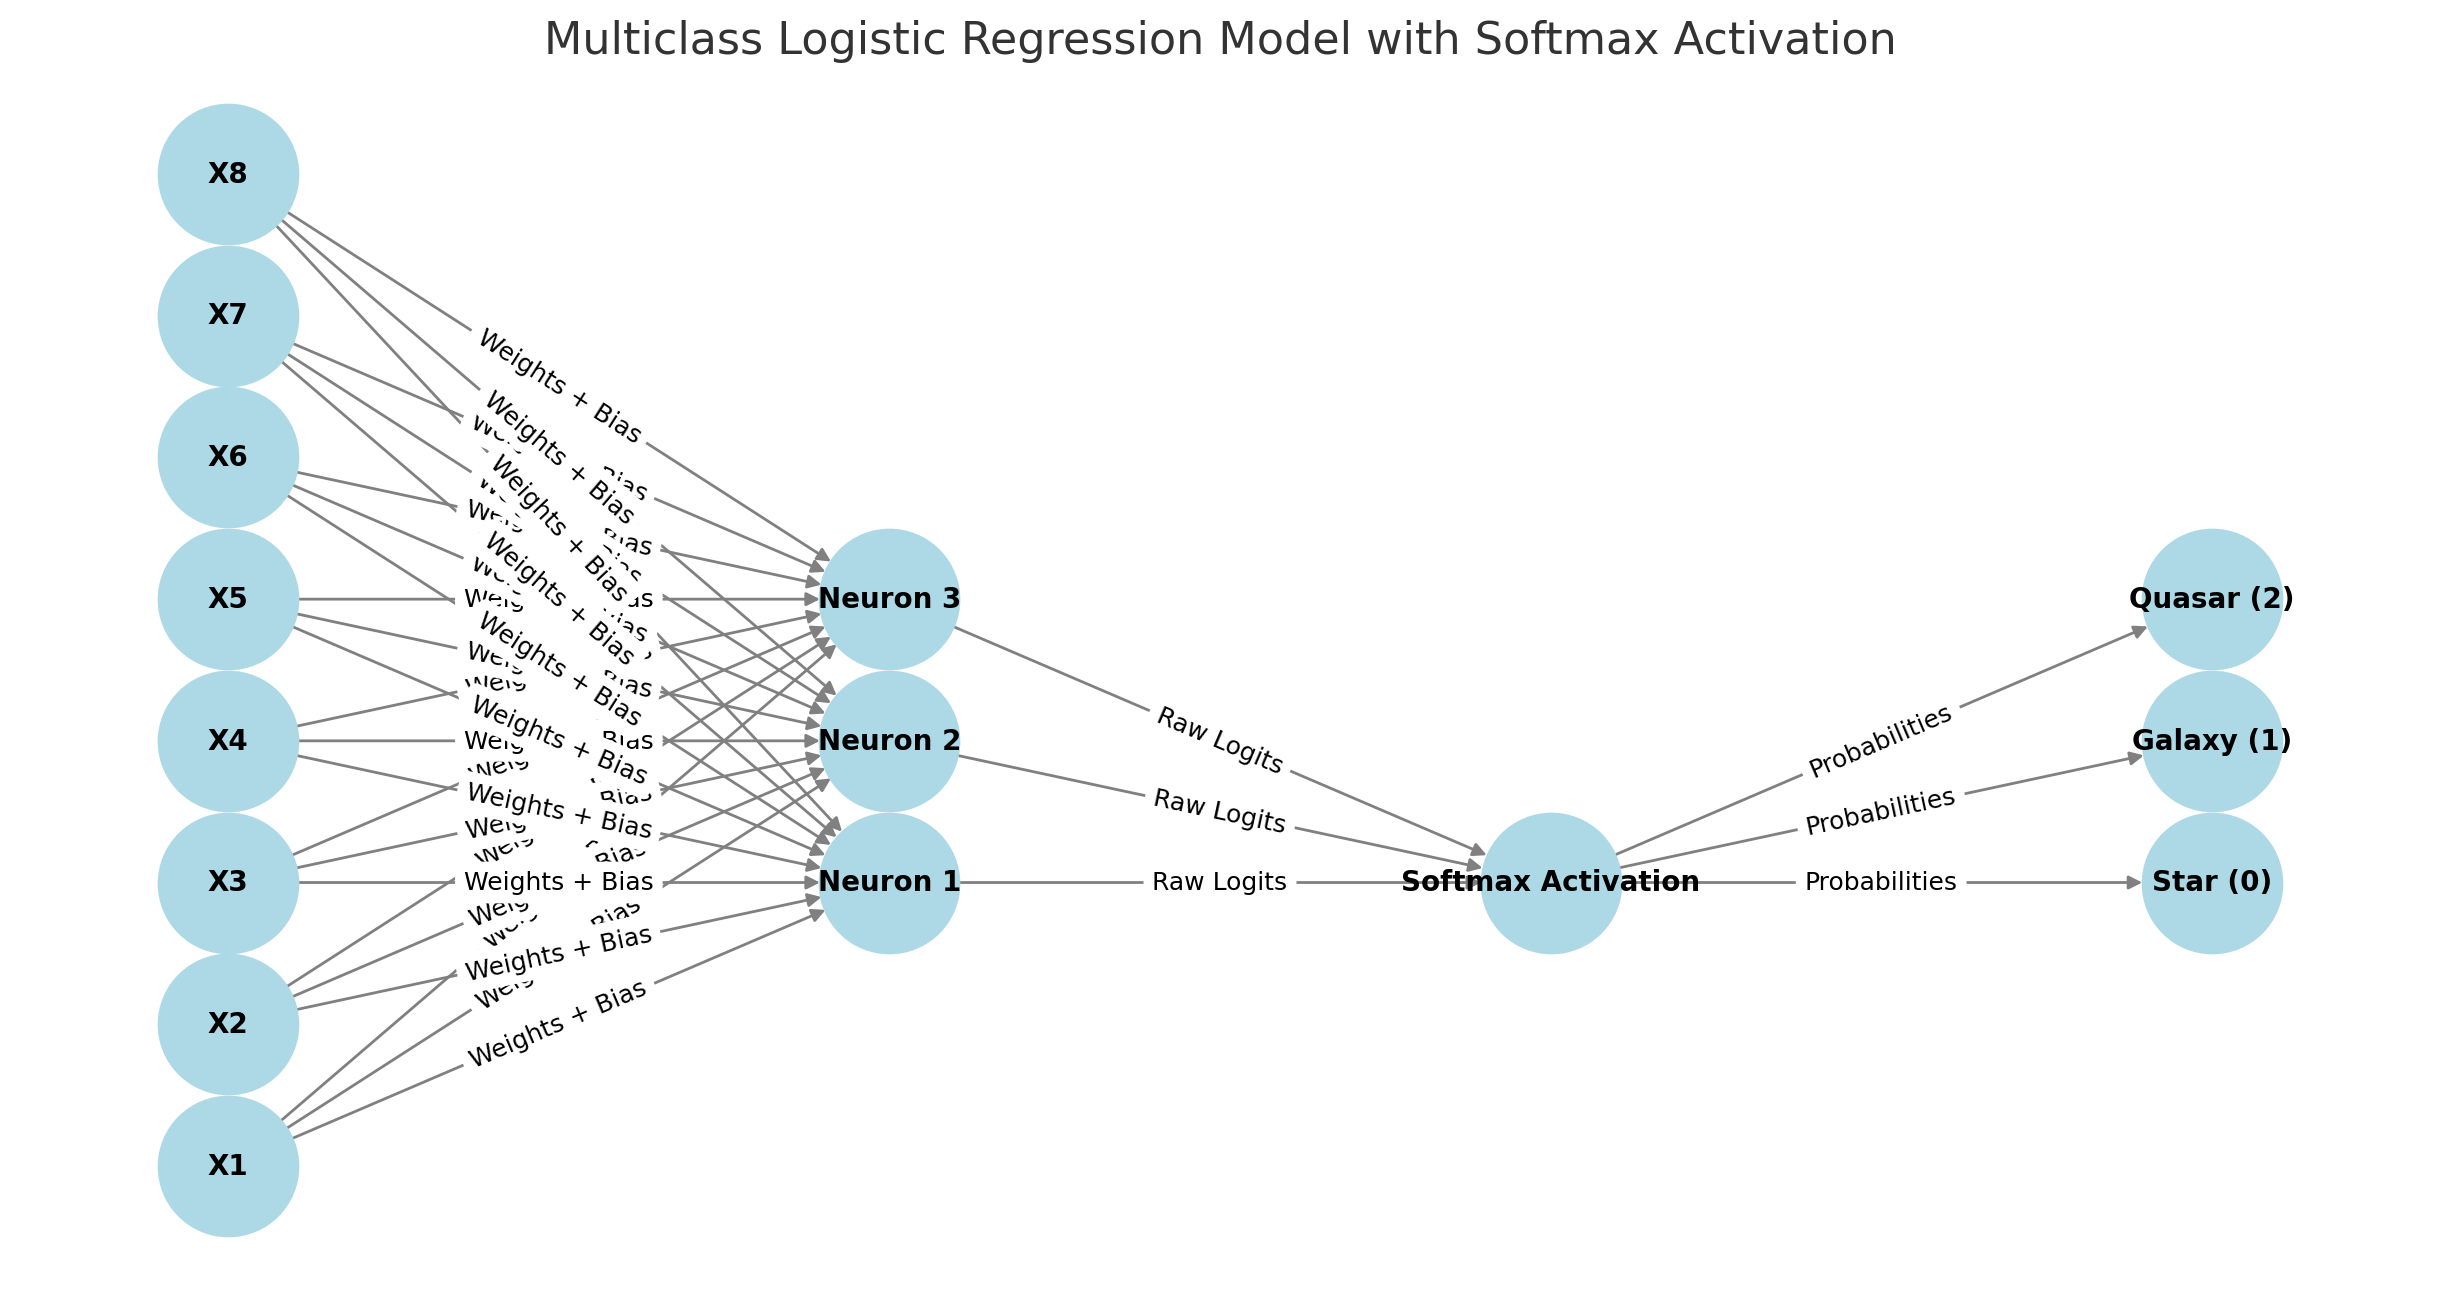

In [12]:
from IPython.display import display
from PIL import Image

# Load and display the image
img = Image.open("Multiclass Logistic Regression Model with Softmax Activation.png")
display(img)

In [13]:
model.train()

# Store losses
losses = []

for epoch in range(15000):
    optimizer.zero_grad()

    # forward pass
    Y_pred = model(X_train_tensor)

    # compute loss
    loss = criterion(Y_pred, T_train_tensor)

    losses.append(loss.item())  # Store loss
    
    if epoch% 1000 == 0:
        print(loss.item())
    # backward pass
    loss.backward()
    optimizer.step()

1.2370595932006836
0.4443953335285187
0.38801896572113037
0.3548182547092438
0.3317578434944153
0.31443893909454346
0.30078718066215515
0.2896518409252167
0.2803295850753784
0.27236247062683105
0.2654379904270172
0.2593352198600769
0.25389307737350464
0.2489912062883377
0.24453791975975037


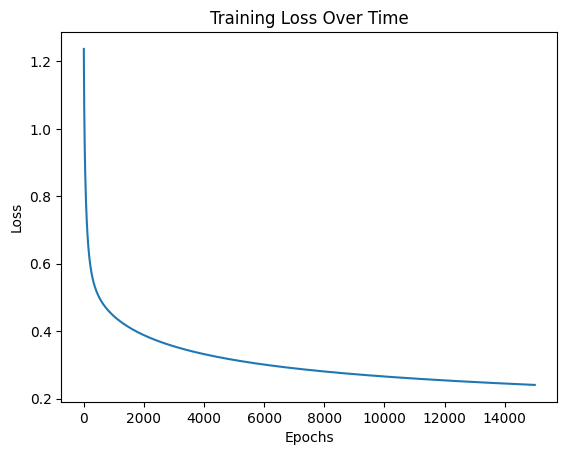

In [14]:
# Plot loss over time
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.show()

Although we aim to minimize the loss function, it hardly tells us as humans how well the classification scheme is performing. To get a better understanding of performance, we look at *accuracy*, or the fraction of correct predictions from total predictions.

4. Define the function `accuracy` which takes as inputs the targets and the predictions by the model and uses it to evaluate the accuracy of our logistic regression model on the train and test datasets. 

In [15]:
def accuracy(Target, Pred):
    with torch.no_grad():
        predicted_labels = torch.argmax(Pred, dim=1)  # Get class predictions
        n_correct = (predicted_labels == Target).sum().item()  # Compare with true labels
        acc = (n_correct / len(Target)) * 100  # Compute accuracy
    return acc

# Example usage:
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    test_logits = model(X_test_tensor)  # Get model predictions (logits)
    test_acc = accuracy(T_test_tensor, test_logits)  # Compute accuracy

print(f"Test Accuracy: {test_acc:.2f}%")

Test Accuracy: 95.80%
